In [1]:
import json
import os

# Define input directories
baseline_dir = '../../answer_relevancy_analysis/answer_relevancy_qualitative_output_baseline'
prompttune_dir = '../../answer_relevancy_analysis/answer_relevancy_qualitative_output_prompttune'

# Read baseline and prompttune K10 files
with open(os.path.join(baseline_dir, 'verbose_AR_baseline_gpt4omini_k10.json'), 'r') as f:
    baseline_data = json.load(f)

with open(os.path.join(prompttune_dir, 'verbose_AR_prompttune_gpt4omini_k10.json'), 'r') as f:
    prompttune_data = json.load(f)

# Find elements in prompttune with final_score = 0
zero_score_prompttune = [item for item in prompttune_data if item['final_score'] == 0]

print("Elements with final_score = 0 in prompttune and their corresponding elements in baseline:")
print("-" * 100)

for item in zero_score_prompttune:
    idx = item['index']
    baseline_item = baseline_data[idx]
    
    print(f"\nIndex: {idx}")
    print(f"Prompttune Final Score: {item['final_score']}")
    print(f"Baseline Final Score: {baseline_item['final_score']}")
    print("\nPrompttune Response:")
    print(item['response'])
    print("\nBaseline Response:")
    print(baseline_item['response'])
    print("\nPrompttune Generated Questions:")
    print(item['generated_questions'])
    print("\nBaseline Generated Questions:")
    print(baseline_item['generated_questions'])
    print("-" * 100)


Elements with final_score = 0 in prompttune and their corresponding elements in baseline:
----------------------------------------------------------------------------------------------------

Index: 6
Prompttune Final Score: 0.0
Baseline Final Score: 0.0

Prompttune Response:
The Non-Disclosure Agreement (NDA) does not explicitly allow the Receiving Party (Mentor) to acquire information similar to the Confidential Information from a third party. However, it does state that Confidential Information does not include "information received from a third party who was free to disclose such information." This implies that if the third party is legally permitted to disclose the information, the Mentor can acquire it without violating the NDA.

In summary, while the NDA does not prohibit the Mentor from obtaining similar information from a third party, it is contingent upon that third party being free to disclose such information. If the third party is not authorized to disclose the information

interesting point for qualitative analysis:


index 120: prompttune share lengthy explanation of strict clauses regarding sharing confidential info, baseline straightforwardly answer that it is not allowed without auth (similar answer but different style of exposition, baseline is more straightforward and confidence of its answer)  
index 155: both state vague answer (not explicityly blablabla) but baseline does not considered to be non-commital  
index 180  
index 181  

analysis conclusion: prompt tune does not jump the gun and arrive in its own statement without a very explicit mention of the thing in the clause, while the baseline is jump into the conclusion, both are somewhat valid response but prompt tune gives a more contextual answer (explaining the context) and taking a careful stance which useful in legal situation

In [2]:
import matplotlib.pyplot as plt


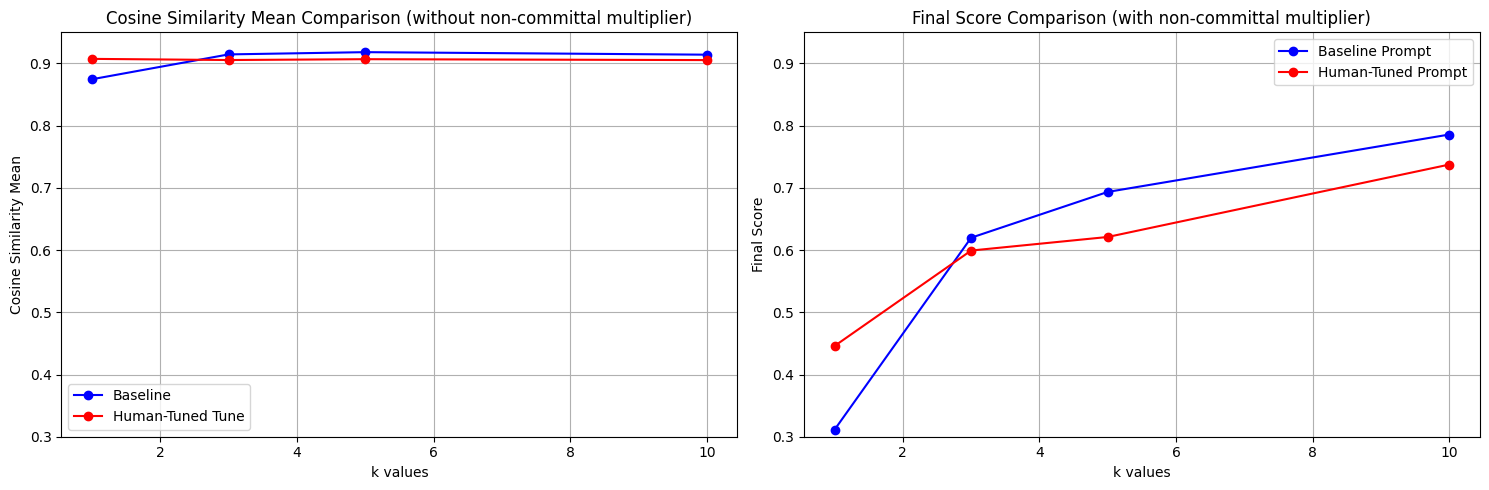

In [6]:
# Read evaluation files
with open(os.path.join(baseline_dir, 'answer_relevancy_verbose_eval.json'), 'r') as f:
    baseline_eval = json.load(f)

with open(os.path.join(prompttune_dir, 'answer_relevancy_verbose_eval.json'), 'r') as f:
    prompttune_eval = json.load(f)

# Extract data for plotting
k_values = [1, 3, 5, 10]
baseline_cosine = [item['cosine_sim_mean_avg'] for item in baseline_eval]
baseline_final = [item['final_score_avg'] for item in baseline_eval]
prompttune_cosine = [item['cosine_sim_mean_avg'] for item in prompttune_eval]
prompttune_final = [item['final_score_avg'] for item in prompttune_eval]

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot cosine similarity means
ax1.plot(k_values, baseline_cosine, 'b-o', label='Baseline')
ax1.plot(k_values, prompttune_cosine, 'r-o', label='Human-Tuned Tune')
ax1.set_xlabel('k values')
ax1.set_ylabel('Cosine Similarity Mean')
ax1.set_title('Cosine Similarity Mean Comparison (without non-committal multil)')
ax1.set_ylim(0.3, 0.95)  # Set similar y-axis range
ax1.legend()
ax1.grid(True)

# Plot final scores
ax2.plot(k_values, baseline_final, 'b-o', label='Baseline Prompt')
ax2.plot(k_values, prompttune_final, 'r-o', label='Human-Tuned Prompt')
ax2.set_xlabel('k values')
ax2.set_ylabel('Final Score')
ax2.set_title('Final Score Comparison (with non-committal multiplier)')
ax2.set_ylim(0.3, 0.95)  # Set similar y-axis range
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


In [7]:
import os

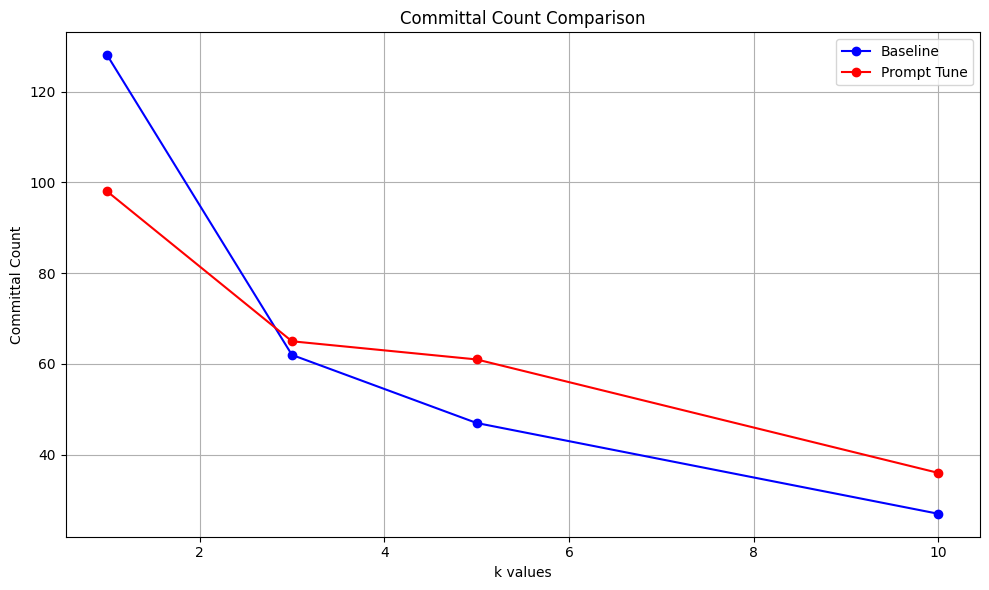

In [ ]:
# Read evaluation files
with open(os.path.join(baseline_dir, 'answer_relevancy_verbose_eval.json'), 'r') as f:
    baseline_eval = json.load(f)

with open(os.path.join(prompttune_dir, 'answer_relevancy_verbose_eval.json'), 'r') as f:
    prompttune_eval = json.load(f)

# Extract data for plotting
k_values = [1, 3, 5, 10]
baseline_committal = [item['zero_score_count'] for item in baseline_eval]
prompttune_committal = [item['zero_score_count'] for item in prompttune_eval]

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot committal counts
ax.plot(k_values, baseline_committal, 'b-o', label='Baseline')
ax.plot(k_values, prompttune_committal, 'r-o', label='Prompt Tune')
ax.set_xlabel('k values')
ax.set_ylabel('Committal Count')
ax.set_title('Committal Count Comparison')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()